### Importing the required libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

## About the dataset:
##### - Diamond price prediction:
##### To predict price of given diamond (Regression Analysis).
###### There are 11 columns (independent):

###### • id : unique identifier of each diamond
###### •	carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
###### •	cut : Quality of Diamond Cut
###### •	color : Color of Diamond
###### •	clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
###### •	depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface) {depth: Total depth percentage: 100 * z / mean(x, y)}
###### •	table : A diamond's table is the facet which can be seen when the stone is viewed face up.
###### •	x : Diamond X dimension
###### •	y : Diamond Y dimension
###### •	x : Diamond Z dimension
	
###### Target variable:
###### •	price: Price of the given Diamond.

### Loading the data

In [3]:
df=pd.read_csv("gemstone.csv") # reading the csv file

In [4]:
df.head(10) #Head of the data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [5]:
df.shape #Checking the shape of the data

(193573, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.isnull().sum() #Checking for null values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df.columns #Checking the columns of the data

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [9]:
df.duplicated().sum() #Checked for duplicate values

0

### Value counts of each column

In [10]:
df['carat'].value_counts(normalize=True)

0.30    0.055576
1.01    0.052192
0.31    0.049273
0.70    0.041111
0.32    0.038993
          ...   
2.72    0.000005
3.40    0.000005
3.50    0.000005
2.71    0.000005
1.96    0.000005
Name: carat, Length: 248, dtype: float64

In [11]:
df['cut'].value_counts(normalize=True)

Ideal        0.477618
Premium      0.257836
Very Good    0.194066
Good         0.060039
Fair         0.010441
Name: cut, dtype: float64

In [12]:
df['color'].value_counts(normalize=True)

G    0.229324
E    0.185300
F    0.176977
H    0.159108
D    0.125462
I    0.090477
J    0.033352
Name: color, dtype: float64

In [13]:
df['clarity'].value_counts(normalize=True)

SI1     0.275204
VS2     0.248108
VS1     0.158436
SI2     0.157481
VVS2    0.081427
VVS1    0.054904
IF      0.021795
I1      0.002645
Name: clarity, dtype: float64

In [14]:
df['table'].value_counts(normalize=True)

56.0    0.217975
57.0    0.195415
58.0    0.165545
55.0    0.126200
59.0    0.122868
          ...   
64.4    0.000005
53.1    0.000005
49.0    0.000005
61.9    0.000005
58.7    0.000005
Name: table, Length: 108, dtype: float64

In [15]:
df['depth'].value_counts(normalize=True)

61.9    0.055695
62.0    0.052435
61.8    0.047889
62.1    0.045802
61.6    0.044087
          ...   
69.4    0.000005
68.1    0.000005
52.1    0.000005
55.8    0.000005
55.0    0.000005
Name: depth, Length: 153, dtype: float64

In [16]:
df['x'].value_counts(normalize=True)

4.32    0.010818
4.34    0.010384
4.38    0.010260
4.37    0.010012
4.33    0.009361
          ...   
8.79    0.000005
8.90    0.000005
9.30    0.000005
8.87    0.000005
9.10    0.000005
Name: x, Length: 522, dtype: float64

In [17]:
df['y'].value_counts(normalize=True)

4.38     0.011174
4.35     0.010787
4.34     0.010260
4.37     0.009872
4.31     0.009578
           ...   
8.71     0.000005
3.80     0.000005
10.01    0.000005
8.79     0.000005
9.36     0.000005
Name: y, Length: 521, dtype: float64

In [18]:
df['z'].value_counts(normalize=True)

2.69    0.018200
2.70    0.017074
2.68    0.016991
2.71    0.015947
2.72    0.014914
          ...   
5.65    0.000005
5.69    0.000005
5.33    0.000005
2.28    0.000005
5.73    0.000005
Name: z, Length: 349, dtype: float64

In [19]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


# Data cleaning

In [20]:
df.drop(["id"],axis=1,inplace=True) #dropping the id column as it has all unique values

In [21]:
df.head() #Checking the data after removing the id column

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### There are few values where there are zeros in the x,y,z column. as we know there cannot be zero length, zero width or zero depth, it means that there are missing values in the x, y, z columns which means there are only 2 dimentions available in few rows. we will drop them

In [22]:
data = df.drop(df[df["x"]==0].index) 
data = df.drop(df[df["y"]==0].index)
data = df.drop(df[df["z"]==0].index)

In [23]:
data.shape #for cleaned data

(193563, 10)

### AS we can see there were (193573 data points and now after dropping the dimention less datapoints we have 193563 datapoints which means there were 10 missing values

In [24]:
# Importing libraries for data visualization

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

### Outliers viz

In [26]:
# Boxplot

<AxesSubplot:>

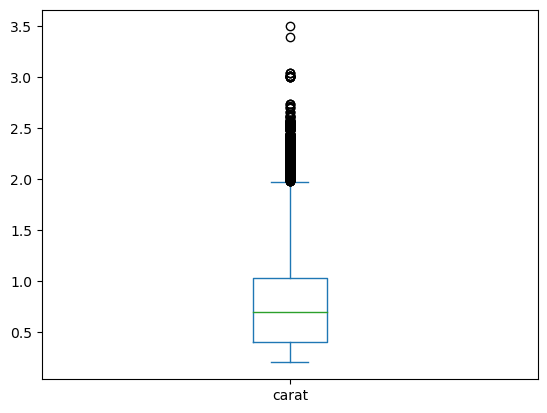

In [27]:
data["carat"].plot(kind="box")

<AxesSubplot:>

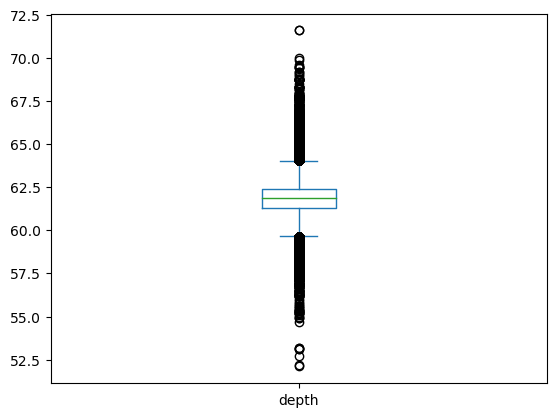

In [28]:
data["depth"].plot(kind="box")

<AxesSubplot:>

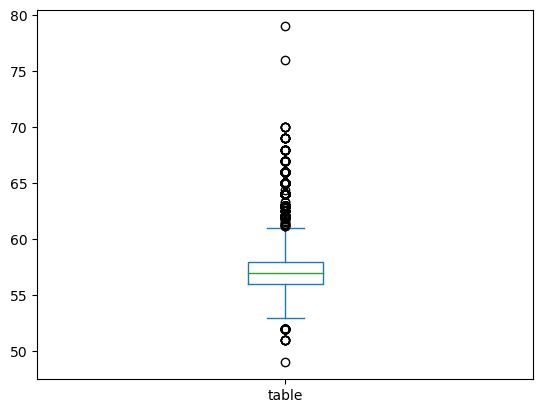

In [29]:
data["table"].plot(kind="box")

<AxesSubplot:>

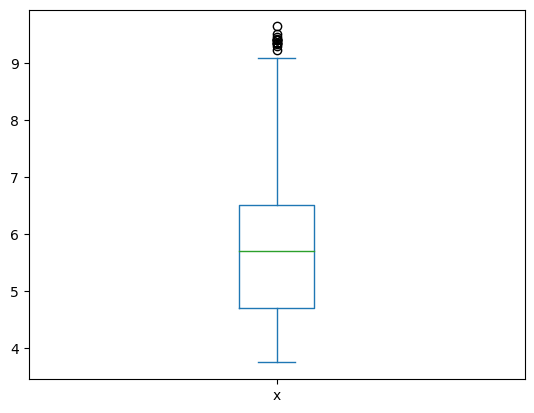

In [30]:
data["x"].plot(kind="box")

<AxesSubplot:>

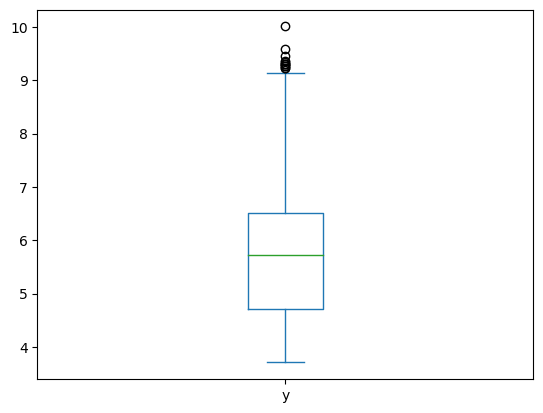

In [31]:
data["y"].plot(kind="box")

<AxesSubplot:>

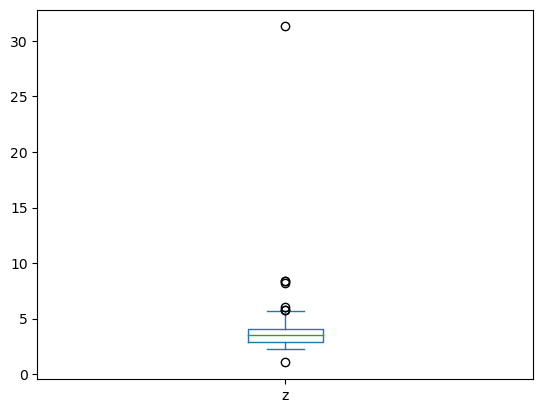

In [32]:
data["z"].plot(kind="box")

<AxesSubplot:>

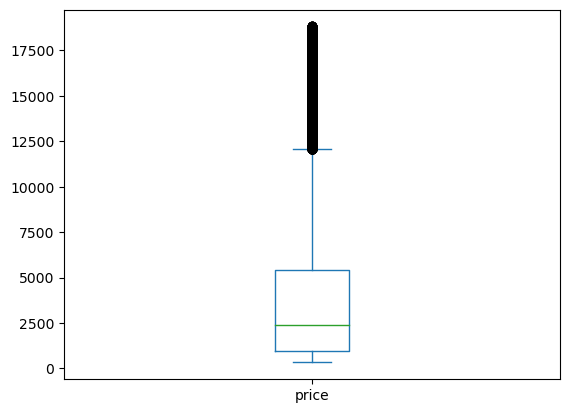

In [33]:
data["price"].plot(kind="box")

In [34]:
# Dropping the outliers
# Capping the table and depth columns

In [35]:
data = data[(data["depth"]<70.0)&(data["depth"]>54.0)]
data = data[(data["table"]<73)&(data["table"]>50)] 
data = data[(data["x"]>2)]
data = data[(data["y"]<9)]
data = data[(data["z"]<6)&(data["z"]>2)]

In [36]:
data.shape #shape after dropping the outliers

(193530, 10)

### Uni-variate

<AxesSubplot:ylabel='cut'>

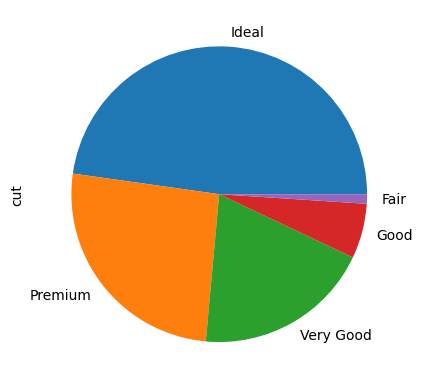

In [37]:
data['cut'].value_counts().plot(kind='pie')

<AxesSubplot:>

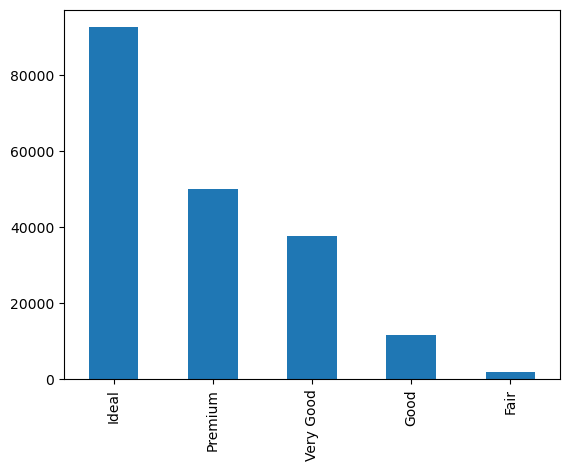

In [38]:
data['cut'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='clarity'>

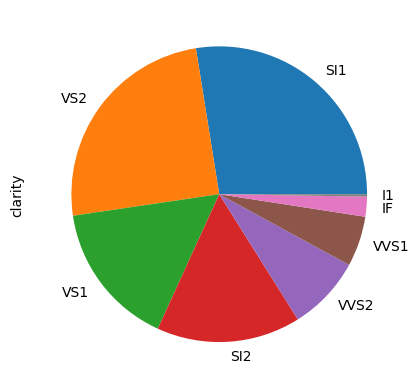

In [39]:
data['clarity'].value_counts().plot(kind='pie')

<AxesSubplot:>

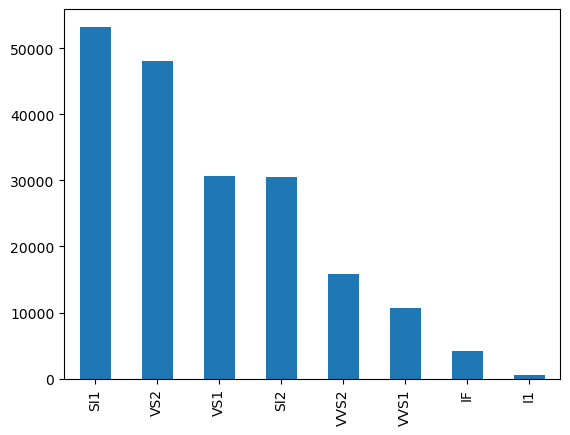

In [40]:
data['clarity'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='color'>

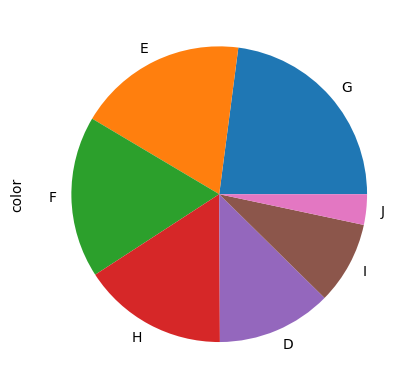

In [41]:
data['color'].value_counts().plot(kind='pie')

<AxesSubplot:>

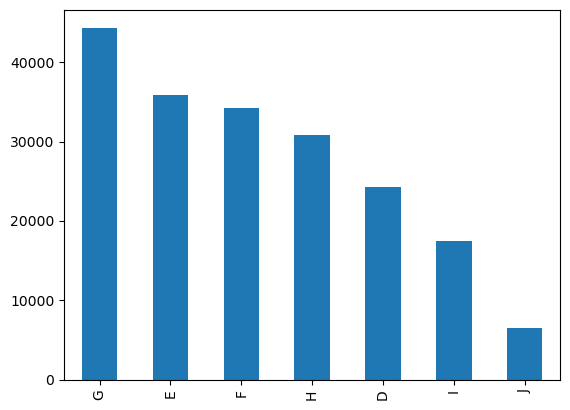

In [42]:
data['color'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

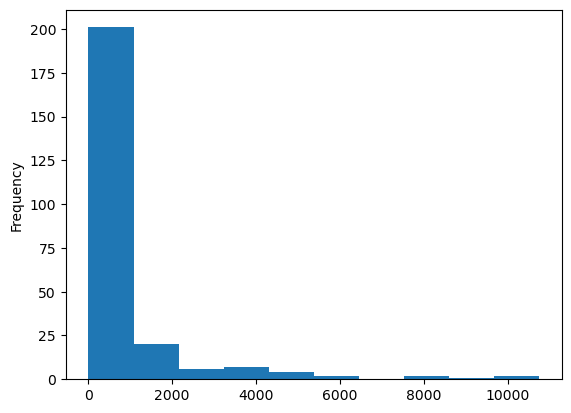

In [43]:
data['carat'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

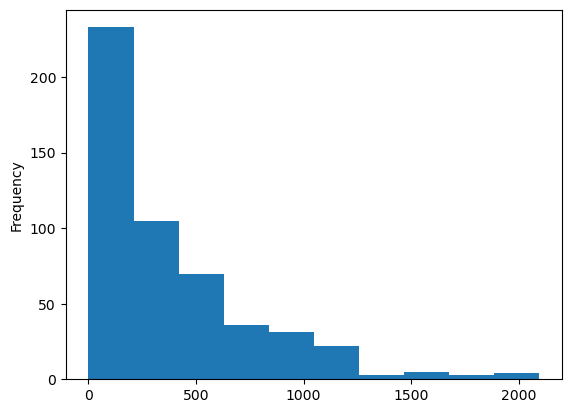

In [44]:
data['x'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

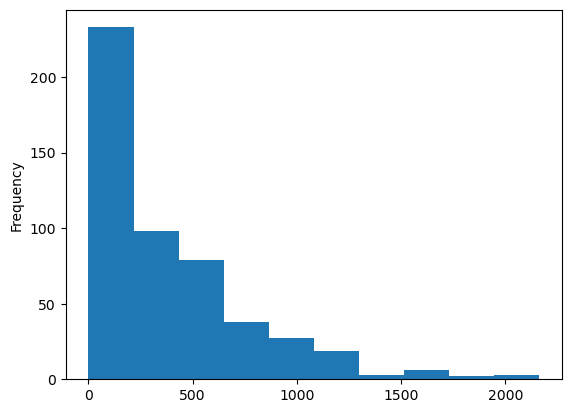

In [45]:
data['y'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

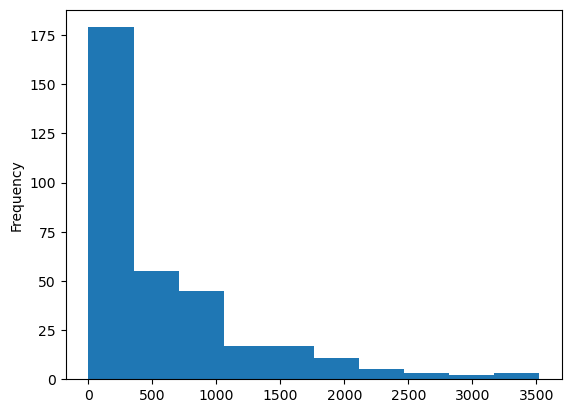

In [46]:
data['z'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

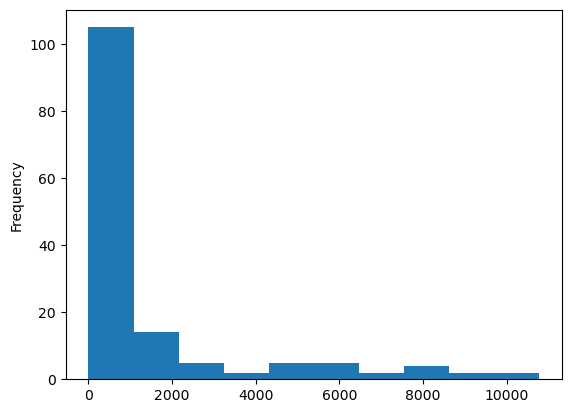

In [47]:
data['depth'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

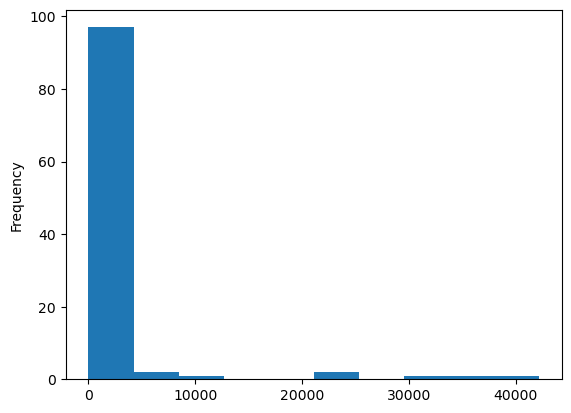

In [48]:
data['table'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

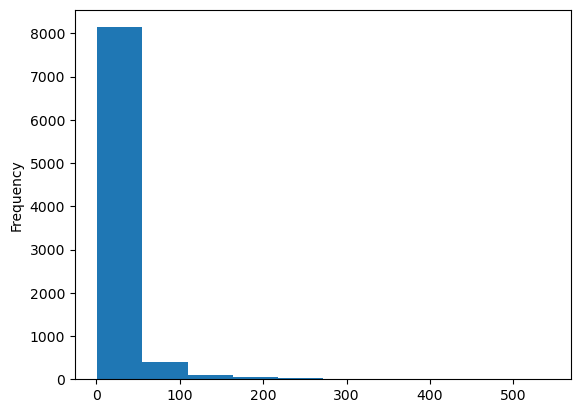

In [49]:
data['price'].value_counts().plot(kind='hist')

### Bi-variate

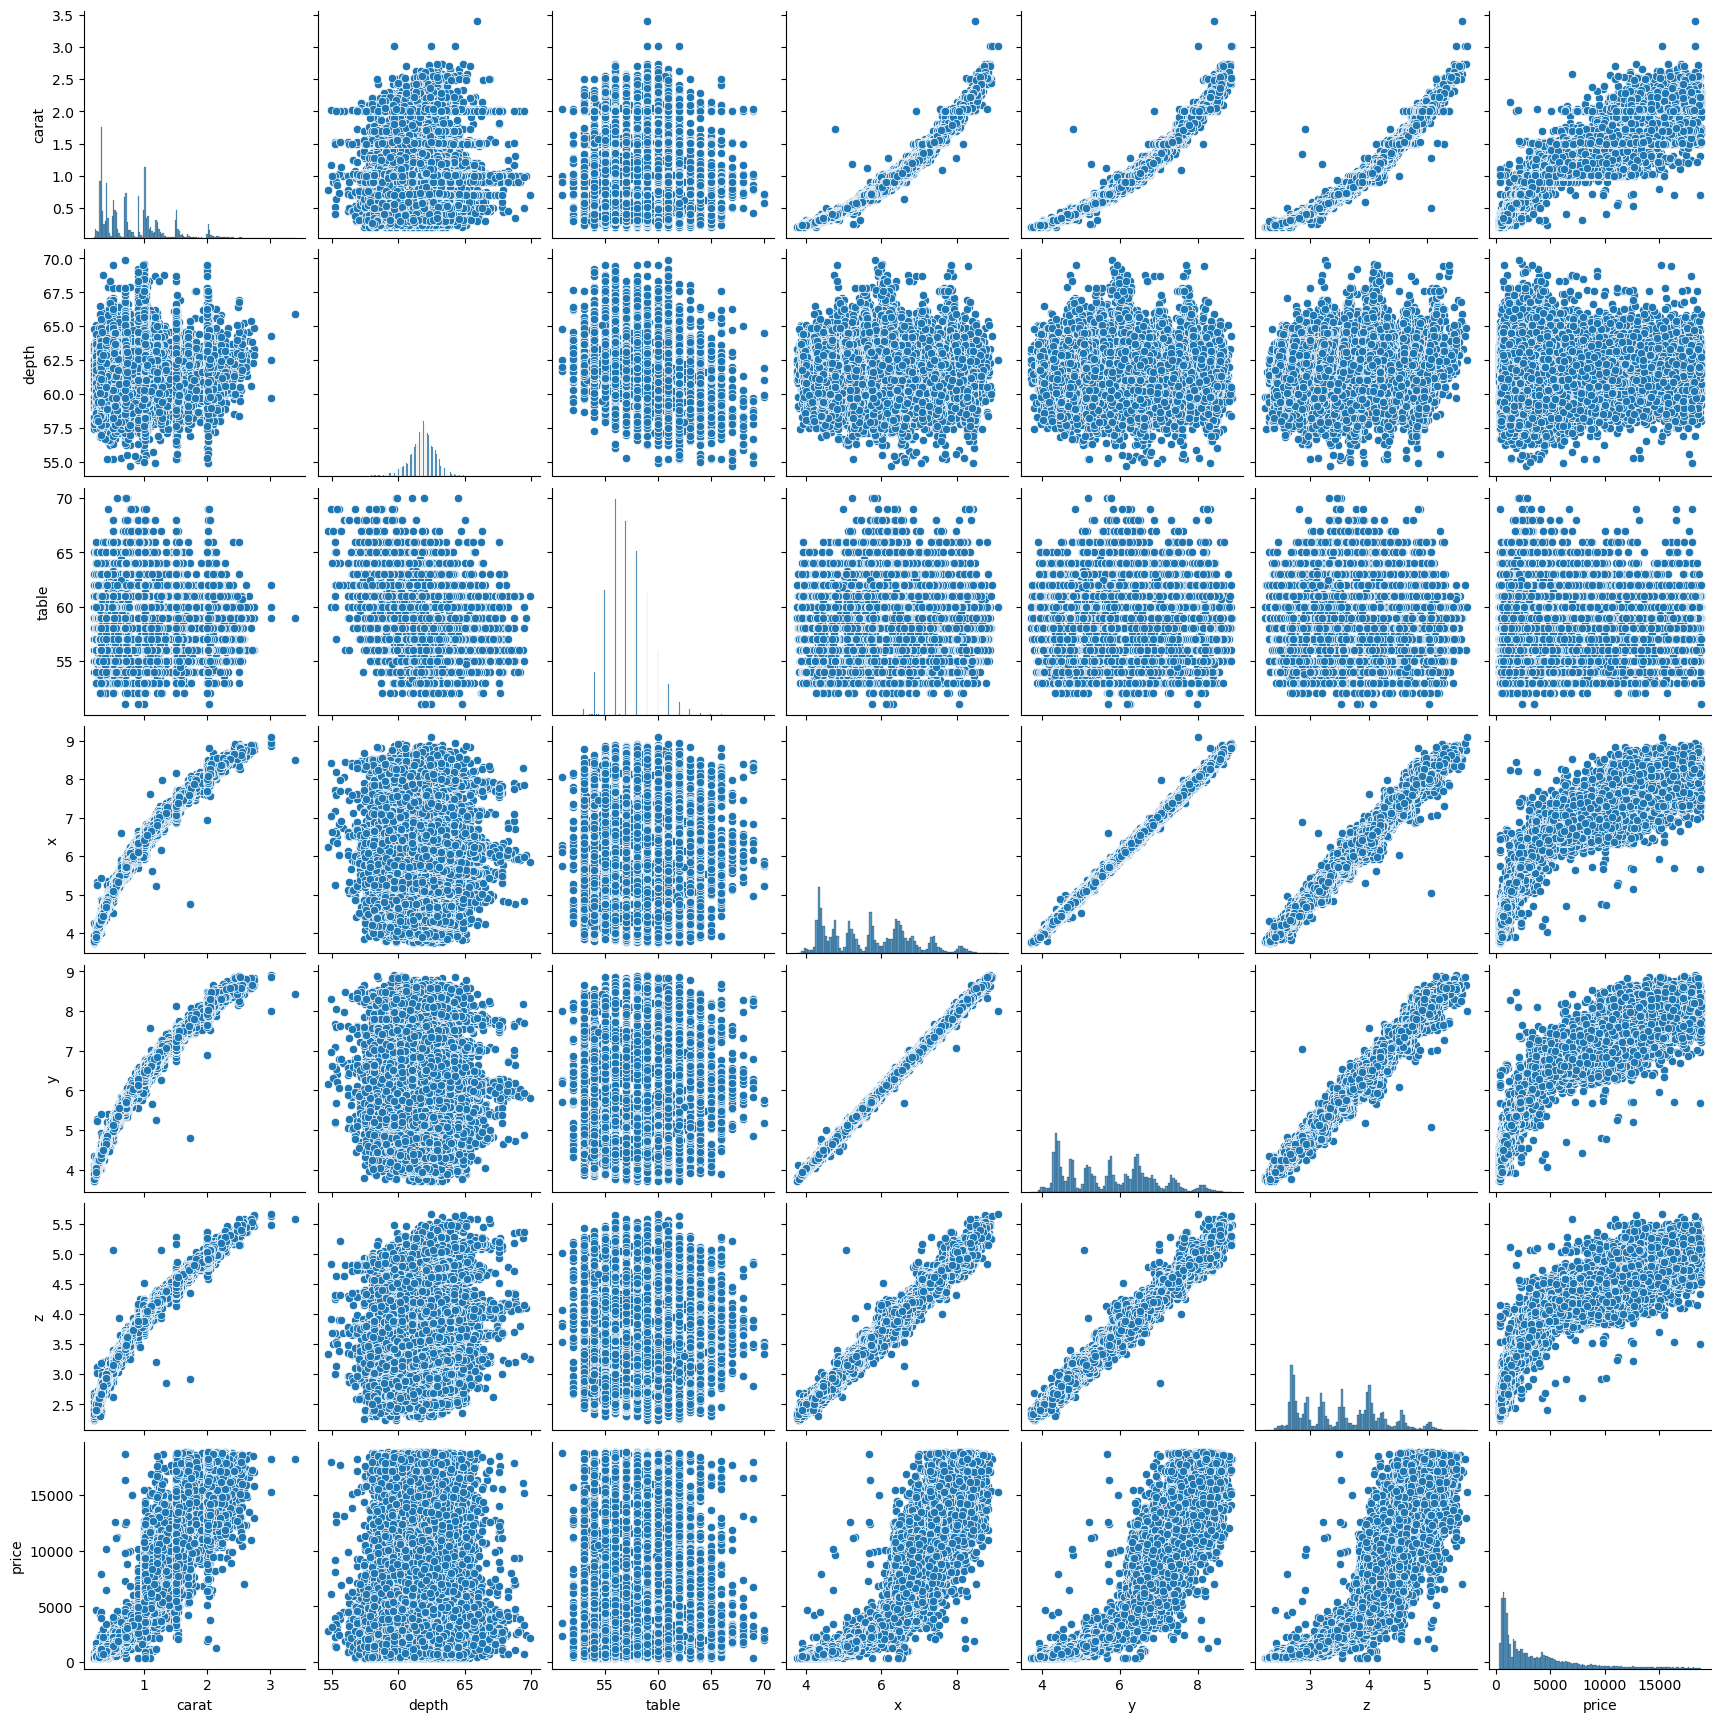

In [50]:
sns.pairplot(data)

<AxesSubplot:xlabel='price', ylabel='depth'>

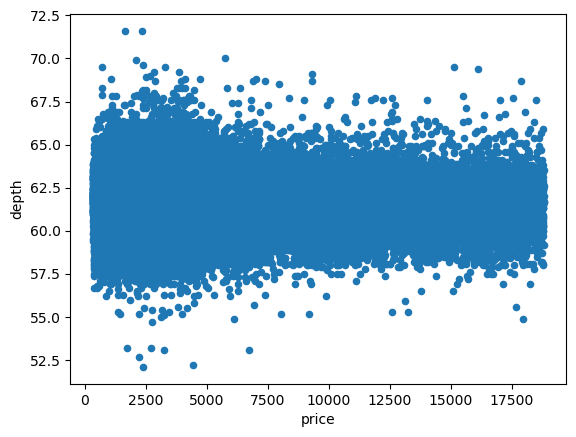

In [51]:
df.plot(kind='scatter',x='price',y='depth')

<AxesSubplot:xlabel='price', ylabel='table'>

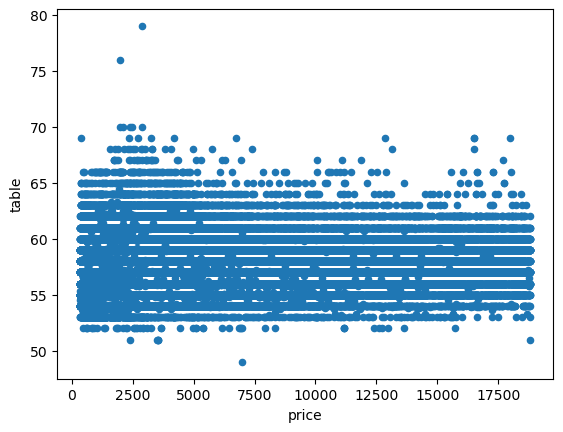

In [52]:
df.plot(kind='scatter',x='price',y='table')

<AxesSubplot:xlabel='price', ylabel='carat'>

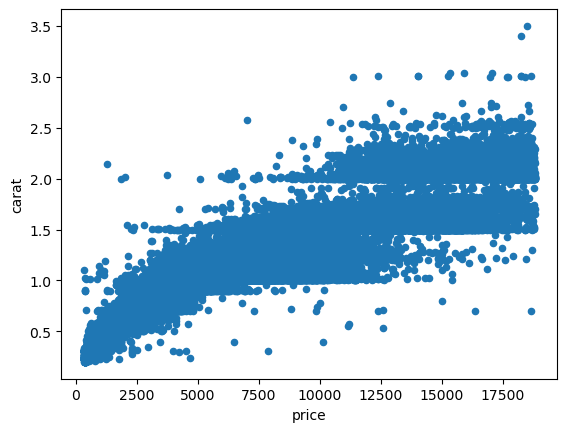

In [53]:
df.plot(kind='scatter',x='price',y='carat')

<AxesSubplot:xlabel='price', ylabel='cut'>

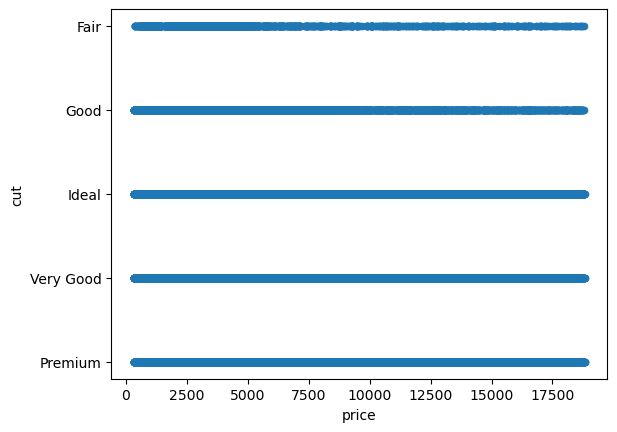

In [54]:
df.plot(kind='scatter',x='price',y='cut')

<AxesSubplot:xlabel='price', ylabel='color'>

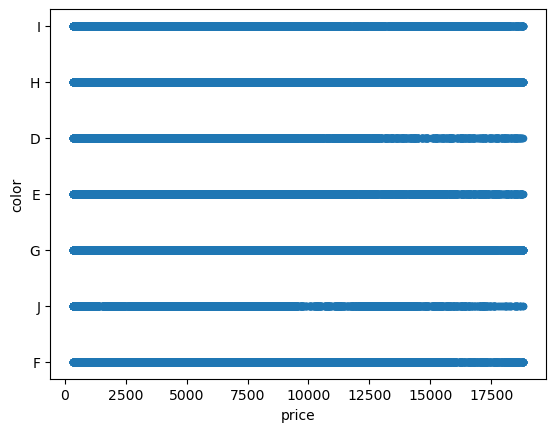

In [55]:
df.plot(kind='scatter',x='price',y='color')

<AxesSubplot:xlabel='price', ylabel='clarity'>

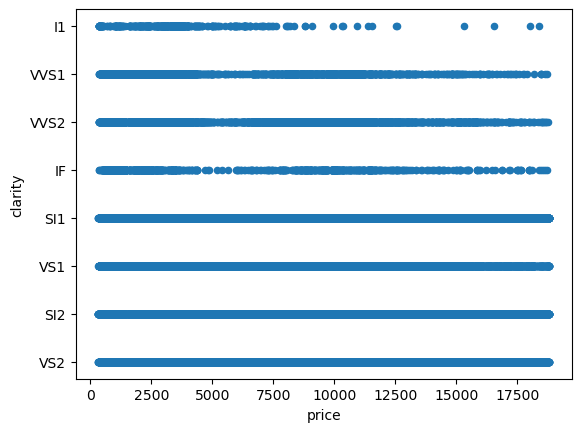

In [56]:
df.plot(kind='scatter',x='price',y='clarity')

<AxesSubplot:xlabel='price', ylabel='x'>

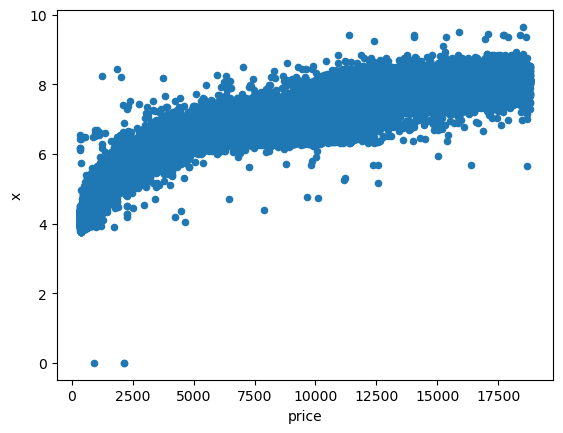

In [57]:
df.plot(kind='scatter',x='price',y='x')

<AxesSubplot:xlabel='price', ylabel='y'>

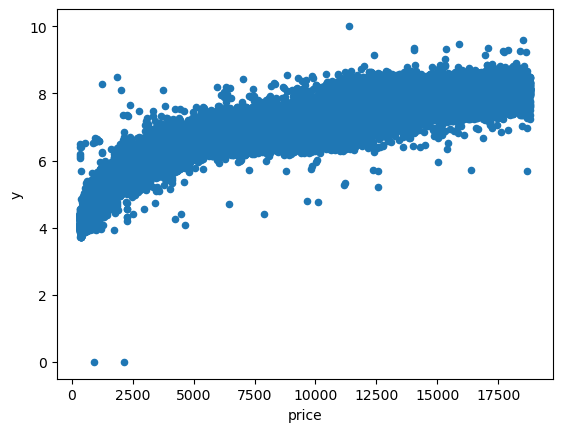

In [58]:
df.plot(kind='scatter',x='price',y='y')

<AxesSubplot:xlabel='price', ylabel='z'>

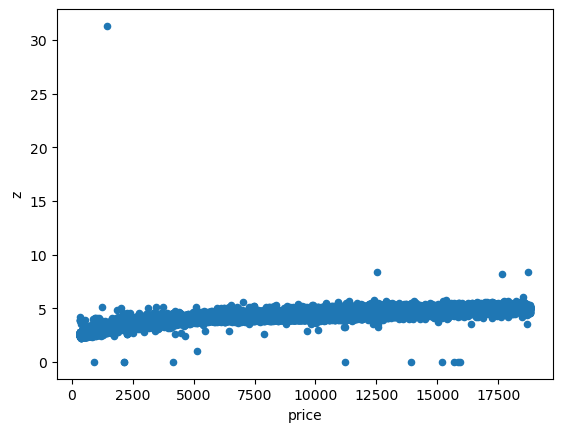

In [59]:
df.plot(kind='scatter',x='price',y='z')

In [60]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

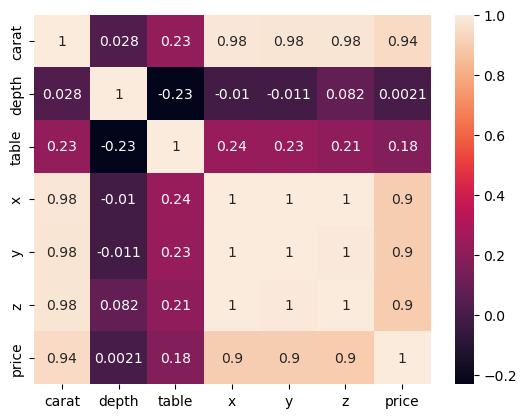

In [61]:
sns.heatmap(data.corr(), annot=True)

# model building

In [62]:
# Identifying input and target variable

In [63]:
X=data[['carat','cut','color','clarity','depth','table','x','y','z']]
y=data['price']

In [64]:
# split into train and test with 80 and 20 ratio

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)

In [66]:
# Cheacking shape of splited data
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(154824, 9) (154824,)
(38706, 9) (38706,)


### Separating categorical and numerical columns for train data

In [67]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
101498,0.42,Ideal,G,VS1,61.1,57.0,4.80,4.82,2.94
29626,0.30,Very Good,G,SI1,62.6,55.0,4.27,4.29,2.68
171116,0.51,Ideal,G,VS2,61.8,57.0,5.13,5.09,3.17
33157,0.67,Very Good,G,VS2,60.5,61.0,5.64,5.67,3.42
164446,1.01,Good,D,SI2,63.6,57.0,6.37,6.21,3.99


In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154824 entries, 101498 to 38418
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    154824 non-null  float64
 1   cut      154824 non-null  object 
 2   color    154824 non-null  object 
 3   clarity  154824 non-null  object 
 4   depth    154824 non-null  float64
 5   table    154824 non-null  float64
 6   x        154824 non-null  float64
 7   y        154824 non-null  float64
 8   z        154824 non-null  float64
dtypes: float64(6), object(3)
memory usage: 11.8+ MB


In [69]:
# separating object
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,cut,color,clarity
101498,Ideal,G,VS1
29626,Very Good,G,SI1
171116,Ideal,G,VS2
33157,Very Good,G,VS2
164446,Good,D,SI2


In [70]:
# separating numerical
X_train_num=X_train.select_dtypes(include=[int,float])
X_train_num.head()

,carat,depth,table,x,y,z
101498,0.42,61.1,57.0,4.80,4.82,2.94
29626,0.30,62.6,55.0,4.27,4.29,2.68
171116,0.51,61.8,57.0,5.13,5.09,3.17
33157,0.67,60.5,61.0,5.64,5.67,3.42
164446,1.01,63.6,57.0,6.37,6.21,3.99


In [71]:
## Scaling the numerical features
# standardization for num adding to dataframe
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_train_num_rescaled

,carat,depth,table,x,y,z
101498,-0.801225,-0.669561,-0.118518,-0.824972,-0.816491,-0.866837
29626,-1.060618,0.723863,-1.160878,-1.302732,-1.297280,-1.246114
171116,-0.606680,-0.019297,-0.118518,-0.527499,-0.571560,-0.531322
33157,-0.260823,-1.226931,1.966201,-0.067767,-0.045413,-0.166632
164446,0.474124,1.652812,-0.118518,0.590279,0.444448,0.664861
...,...,...,...,...,...,...
82284,-0.822841,0.630968,0.402661,-0.897086,-0.870920,-0.837662
65628,0.495740,1.467022,0.923841,0.590279,0.625878,0.752386
77669,-1.060618,-0.390876,1.445021,-1.275689,-1.315423,-1.319052
56100,-1.017386,-0.112192,0.923841,-1.185545,-1.179351,-1.187764


In [72]:
X_train_num_rescaled.describe()

,carat,depth,table,x,y,z
count,1.548240e+05,1.548240e+05,1.548240e+05,1.548240e+05,1.548240e+05,1.548240e+05
mean,2.639110e-16,-5.104926e-15,5.831651e-15,-2.105827e-16,-2.512673e-17,1.617565e-15
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.276779e+00,-6.614838e+00,-3.245597e+00,-1.771477e+00,-1.823428e+00,-1.887969e+00
25%,-8.444573e-01,-4.837714e-01,-6.396981e-01,-9.151151e-01,-9.162773e-01,-9.251873e-01
50%,-1.959745e-01,7.359823e-02,-1.185184e-01,-1.368127e-02,-5.554555e-05,-6.168673e-03
75%,5.173566e-01,5.380729e-01,4.026614e-01,7.164801e-01,7.165932e-01,7.232111e-01
max,4.797343e+00,7.505194e+00,6.656819e+00,3.051194e+00,2.884682e+00,3.115577e+00


In [73]:
# Applying label encoding on categorical columns

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
101498
29626
171116
33157
164446


In [76]:
X_train_cat.cut.unique()

array(['Ideal', 'Very Good', 'Good', 'Premium', 'Fair'], dtype=object)

In [77]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
101498,5
29626,3
171116,5
33157,3
164446,2


In [78]:
X_train_cat.color.unique()

array(['G', 'D', 'F', 'H', 'I', 'E', 'J'], dtype=object)

In [79]:
color_encoder = {'J':1, 'I':1, 'H':1, 'G':1, 'F':2, 'E':2, 'D':2}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,cut,color
101498,5,1
29626,3,1
171116,5,1
33157,3,1
164446,2,2


In [80]:
X_train_cat.clarity.unique()

array(['VS1', 'SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [81]:
clarity_encoder = {'SI1':2, 'VS2':3, 'VS1':3, 'SI2':2, 'VVS2':4, 'VVS1':4, 'IF':5, 'I1':1}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
101498,5,1,3
29626,3,1,2
171116,5,1,3
33157,3,1,3
164446,2,2,2


In [82]:
# Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [83]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
101498,-0.801225,-0.669561,-0.118518,-0.824972,-0.816491,-0.866837,5,1,3
29626,-1.060618,0.723863,-1.160878,-1.302732,-1.297280,-1.246114,3,1,2
171116,-0.606680,-0.019297,-0.118518,-0.527499,-0.571560,-0.531322,5,1,3
33157,-0.260823,-1.226931,1.966201,-0.067767,-0.045413,-0.166632,3,1,3
164446,0.474124,1.652812,-0.118518,0.590279,0.444448,0.664861,2,2,2


### Separating categorical and numerical columns for test data

In [84]:
X_test.shape

(38706, 9)

In [85]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
3399,1.01,Premium,G,SI1,62.9,58.0,6.41,6.37,4.01
83632,0.70,Very Good,G,VS1,62.2,56.0,5.62,5.66,3.50
37512,0.31,Ideal,G,IF,62.1,55.0,4.32,4.35,2.69
114152,0.41,Ideal,G,IF,61.7,54.0,4.77,4.80,2.95
183539,0.24,Very Good,E,VVS2,63.5,58.0,3.95,3.98,2.54


In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38706 entries, 3399 to 180902
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    38706 non-null  float64
 1   cut      38706 non-null  object 
 2   color    38706 non-null  object 
 3   clarity  38706 non-null  object 
 4   depth    38706 non-null  float64
 5   table    38706 non-null  float64
 6   x        38706 non-null  float64
 7   y        38706 non-null  float64
 8   z        38706 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.0+ MB


In [87]:
# separating object
X_test_cat=X_test.select_dtypes(include=['object'])
X_test_cat.head()

,cut,color,clarity
3399,Premium,G,SI1
83632,Very Good,G,VS1
37512,Ideal,G,IF
114152,Ideal,G,IF
183539,Very Good,E,VVS2


In [88]:
# separating numerical
X_test_num=X_test.select_dtypes(include=[int,float])
X_test_num.head()

,carat,depth,table,x,y,z
3399,1.01,62.9,58.0,6.41,6.37,4.01
83632,0.70,62.2,56.0,5.62,5.66,3.50
37512,0.31,62.1,55.0,4.32,4.35,2.69
114152,0.41,61.7,54.0,4.77,4.80,2.95
183539,0.24,63.5,58.0,3.95,3.98,2.54


In [89]:
## Scaling the numerical features
# standardization for num adding to dataframe
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

In [90]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
3399,0.474124,1.002548,0.402661,0.626337,0.589592,0.694036,Premium,G,SI1
83632,-0.195975,0.352283,-0.639698,-0.085796,-0.054485,-0.049931,Very Good,G,VS1
37512,-1.039002,0.259388,-1.160878,-1.257660,-1.242851,-1.231527,Ideal,G,IF
114152,-0.822841,-0.112192,-1.682058,-0.852015,-0.834634,-0.852249,Ideal,G,IF
183539,-1.190315,1.559917,0.402661,-1.591190,-1.578497,-1.450341,Very Good,E,VVS2


In [91]:
X_test_num_rescaled.describe()

,carat,depth,table,x,y,z
count,38706.000000,38706.000000,38706.000000,38706.000000,38706.000000,38706.000000
mean,-0.002282,-0.000046,-0.000859,-0.001002,-0.001592,-0.001287
std,0.996008,1.014040,0.995966,0.997044,0.996930,0.996979
min,-1.276779,-6.429048,-3.245597,-1.753449,-1.805285,-1.887969
25%,-0.844457,-0.483771,-0.639698,-0.906101,-0.916277,-0.925187
50%,-0.195975,0.073598,-0.118518,-0.013681,-0.000056,-0.006169
75%,0.517357,0.538073,0.402661,0.716480,0.716593,0.723211
max,5.640371,7.226509,6.135639,2.825835,2.812110,2.998876


In [92]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

X_test_cat_le.head()

""
3399
83632
37512
114152
183539


In [93]:
X_test_cat.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [94]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}

X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le.head()

,cut
3399,4
83632,3
37512,5
114152,5
183539,3


In [95]:
X_test_cat.color.unique()

array(['G', 'E', 'H', 'F', 'I', 'D', 'J'], dtype=object)

In [96]:
color_encoder = {'J':1, 'I':1, 'H':1, 'G':1, 'F':2, 'E':2, 'D':2}

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le.head()

,cut,color
3399,4,1
83632,3,1
37512,5,1
114152,5,1
183539,3,2


In [97]:
X_test_cat.clarity.unique()

array(['SI1', 'VS1', 'IF', 'VVS2', 'VS2', 'SI2', 'VVS1', 'I1'],
      dtype=object)

In [98]:
clarity_encoder = {'SI1':2, 'VS2':3, 'VS1':3, 'SI2':2, 'VVS2':4, 'VVS1':4, 'IF':5, 'I1':1}

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
3399,4,1,2
83632,3,1,3
37512,5,1,5
114152,5,1,5
183539,3,2,4


In [99]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
3399,0.474124,1.002548,0.402661,0.626337,0.589592,0.694036,4,1,2
83632,-0.195975,0.352283,-0.639698,-0.085796,-0.054485,-0.049931,3,1,3
37512,-1.039002,0.259388,-1.160878,-1.257660,-1.242851,-1.231527,5,1,5
114152,-0.822841,-0.112192,-1.682058,-0.852015,-0.834634,-0.852249,5,1,5
183539,-1.190315,1.559917,0.402661,-1.591190,-1.578497,-1.450341,3,2,4


# Model Building (Logical Structure)

In [100]:
# importing libraries required for the model building

In [101]:
from keras import Sequential
import tensorflow as tf
from tensorflow import keras
import keras_tuner as k
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense
from keras.layers import Dense,Dropout,BatchNormalization,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.optimizers import SGD 
from keras.initializers import Zeros,Ones,GlorotNormal,GlorotUniform,HeNormal,HeUniform,RandomNormal,RandomUniform

Using TensorFlow backend


In [116]:
def modellss(hp):
    model = Sequential()
    model.add(Input(shape=(9,)))
    for i in range(hp.Int("hiddenlayers", min_value=5, max_value=35)):
        model.add(Dense(units=hp.Int("neurons{}".format(i), min_value=4, max_value=40),activation="relu"))
        model.add(BatchNormalization())
        
    model.add(Dense(1, activation="linear"))
    model.compile(
    optimizer=hp.Choice("optimizer", ["sgd", "adam", "adadelta", "rmsprop"]),loss="mse",metrics=["mse"])
    return model

In [117]:
tuner=k.RandomSearch(modellss,objective="val_loss",max_trials=4,directory=r"D:\data science\Deep Learning\diamond\Trials", project_name='f8')

In [118]:
X_train.shape

(154824, 9)

In [119]:
tuner.search(X_train_transformed,y_train,epochs=15,validation_data=(X_test_transformed,y_test))

Trial 4 Complete [00h 11m 41s]
val_loss: nan

Best val_loss So Far: 686424.625
Total elapsed time: 00h 41m 42s


In [120]:
tuner.search_space_summary()

Search space summary
Default search space size: 37
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 35, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 40, 'step': 1, 'sampling': 'linear'}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 40, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 40, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 40, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 40, 'step': 1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam', 'adadelta', 'rmsprop'], 'ordered': False}
neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 40, 'step': 1, 'sampling': 'linear'}
ne

In [121]:
tuner.results_summary()

Results summary
Results in D:\data science\Deep Learning\diamond\Trials\f8
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 35
neurons1: 25
neurons2: 22
neurons3: 16
neurons4: 27
optimizer: rmsprop
neurons5: 4
neurons6: 4
neurons7: 4
neurons8: 4
neurons9: 4
Score: 686424.625

Trial 1 summary
Hyperparameters:
hiddenlayers: 18
neurons0: 26
neurons1: 27
neurons2: 12
neurons3: 12
neurons4: 21
optimizer: rmsprop
neurons5: 40
neurons6: 24
neurons7: 32
neurons8: 35
neurons9: 33
neurons10: 4
neurons11: 4
neurons12: 4
neurons13: 4
neurons14: 4
neurons15: 4
neurons16: 4
neurons17: 4
Score: 809640.25

Trial 2 summary
Hyperparameters:
hiddenlayers: 35
neurons0: 21
neurons1: 31
neurons2: 30
neurons3: 33
neurons4: 33
optimizer: rmsprop
neurons5: 34
neurons6: 40
neurons7: 33
neurons8: 38
neurons9: 33
neurons10: 35
neurons11: 10
neurons12: 18
neurons13: 20
neurons14: 4
neurons15: 9
neurons16: 18
neurons17: 12
neurons18: 4
n

In [122]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 10,
 'neurons0': 35,
 'neurons1': 25,
 'neurons2': 22,
 'neurons3': 16,
 'neurons4': 27,
 'optimizer': 'rmsprop',
 'neurons5': 4,
 'neurons6': 4,
 'neurons7': 4,
 'neurons8': 4,
 'neurons9': 4}

In [123]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [124]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                350       
                                                                 
 batch_normalization (Batch  (None, 35)                140       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 25)                900       
                                                                 
 batch_normalization_1 (Bat  (None, 25)                100       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 22)                572       
                                                                 
 batch_normalization_2 (Bat  (None, 22)                8

In [125]:
history=fmodel.fit(X_train_transformed,y_train,batch_size=10,epochs=10,validation_split=0.2)

Epoch 1/10
12386/12386 [==============================] - 59s 4ms/step - loss: 3825413.2500 - mse: 3825413.2500 - val_loss: 2753803.5000 - val_mse: 2753803.7500
Epoch 2/10
12386/12386 [==============================] - 60s 5ms/step - loss: 3270794.5000 - mse: 3270794.7500 - val_loss: 3174672.7500 - val_mse: 3174672.7500
Epoch 3/10
12386/12386 [==============================] - 59s 5ms/step - loss: 2921964.2500 - mse: 2921964.2500 - val_loss: 4588939.5000 - val_mse: 4588939.5000
Epoch 4/10
12386/12386 [==============================] - 53s 4ms/step - loss: 2888665.0000 - mse: 2888665.0000 - val_loss: 2788262.5000 - val_mse: 2788262.5000
Epoch 5/10
12386/12386 [==============================] - 53s 4ms/step - loss: 2852951.5000 - mse: 2852951.5000 - val_loss: 2318285.0000 - val_mse: 2318285.0000
Epoch 6/10
12386/12386 [==============================] - 53s 4ms/step - loss: 2657252.7500 - mse: 2657252.7500 - val_loss: 2110964.7500 - val_mse: 2110964.7500
Epoch 7/10
12386/12386 [==========

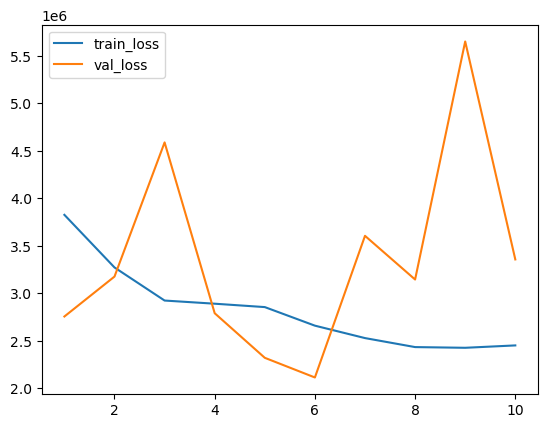

In [126]:
plt.plot(range(1,11),history.history["mse"],label="train_loss")
plt.plot(range(1,11),history.history["val_mse"],label="val_loss")
plt.legend()